In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pandas as pd
os.chdir(r"/Users/yeji/SWING 2023 해커톤 with LONDON/전처리데이터/연도별")


# 미세먼지 + 초미세먼지 발령 합침

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pandas as pd
os.chdir(r"/Users/yeji/SWING 2023 해커톤 with LONDON/전처리데이터/연도별")

주의보_df = pd.read_csv("경보발령수(년도,발령수).csv", engine="python")

In [3]:
주의보_df

,년도,발령수
0,2007,2
1,2008,2
2,2009,2
3,2010,1
4,2011,0
5,2012,0
6,2013,2
7,2014,8
8,2015,9
9,2016,6


In [4]:
주의보_df.drop(주의보_df[(주의보_df['년도'] >2019)].index, inplace=True)

In [5]:
주의보_df

,년도,발령수
0,2007,2
1,2008,2
2,2009,2
3,2010,1
4,2011,0
5,2012,0
6,2013,2
7,2014,8
8,2015,9
9,2016,6


In [6]:
주의보_년도정리_df= 주의보_df.drop(주의보_df[(주의보_df['년도'] < 2010)].index, inplace=True)
주의보_년도정리_df

In [7]:
주의보_df

,년도,발령수
3,2010,1
4,2011,0
5,2012,0
6,2013,2
7,2014,8
8,2015,9
9,2016,6
10,2017,11
11,2018,18
12,2019,33


# 비염

In [8]:
five비염_df = pd.read_csv("연령군5아토피연도별.csv", engine="python")

In [9]:
five비염_df = five비염_df.drop(['Unnamed: 0'],axis=1)

In [10]:
five비염_df

,년도,진료수
0,2010,19178
1,2011,20412
2,2012,22747
3,2013,26049
4,2014,28763
5,2015,30203
6,2016,32631
7,2017,35607
8,2018,37662
9,2019,40571


In [11]:
five비염_df.drop(five비염_df[(five비염_df['년도'] >2019)].index, inplace=True)

In [12]:
five비염_df

,년도,진료수
0,2010,19178
1,2011,20412
2,2012,22747
3,2013,26049
4,2014,28763
5,2015,30203
6,2016,32631
7,2017,35607
8,2018,37662
9,2019,40571


In [13]:
new_merged_five_df = pd.merge(주의보_df, five비염_df)
new_merged_five_df

,년도,발령수,진료수
0,2010,1,19178
1,2011,0,20412
2,2012,0,22747
3,2013,2,26049
4,2014,8,28763
5,2015,9,30203
6,2016,6,32631
7,2017,11,35607
8,2018,18,37662
9,2019,33,40571


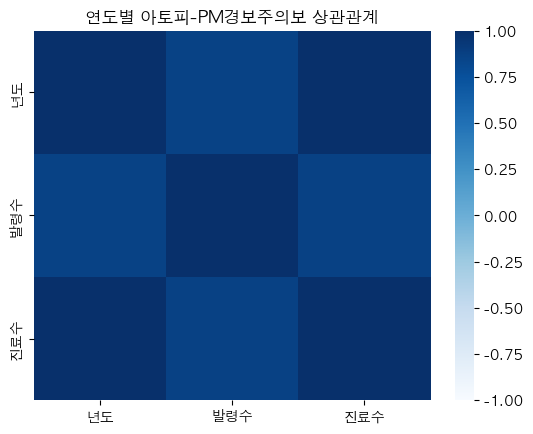

In [14]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = new_merged_five_df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues, vmin = -1.0, vmax=1.0, )  
plt.title('연도별 아토피-PM경보주의보 상관관계')
plt.show()

In [15]:
# cor_target_abs0 = cor['진료수'].sort_values(ascending=False)
# print(cor_target_abs0)


cor_target = cor['진료수']
print(cor_target)

년도     0.997981
발령수    0.874913
진료수    1.000000
Name: 진료수, dtype: float64
